<a href="https://colab.research.google.com/github/mkmritunjay/machineLearning/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting Problems:

### Time Series Analysis

What is Time Series? and Time Series Components (Trend, Seasonality, cyclicity, irregular)
1. Time Series Creation - properties - Time index, lag, lead, difference of series - Concept of Forecasting?
2. Detrending, deseasonal the series
3. Time Series Decomposition
4. Concept of Stationarity - ADF Test
5. Auto correlation Function (ACF), Partial Auto correlation function (PACF)
6. Averages (Moving average, weighted moving average, centered moving average etc)
7. Smothening the Series
8. Time Series Modeling (ARIMA - Box Jenkins process)
9. Types of models (AR, MA, ARMA, ARIMA, ARIMAX, SARIMA, SARIMAX)
10. Advanced models (ARCH, GARCH, VAR, Wavelets etc)
11. Model accuracy metrics & validation (MAE, MSE, RMSE, MAPE etc)

### What is Time Series?

- A time series is a set of observations generated, sequentially in time, on a single variable
- Time periods are of equal length (days, weeks, months, quarters, annual)
- Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as auto correlation, trend or seasonal variation) that should be accounted for
- Time series data is indexed by time and No missing values

> Time series data is ubiquitous, both within and outside of the data science field: weekly initial unemployment claims, tick level stock prices, weekly company sales, daily number of steps taken recorded by a wearable, just to name a few. Some of the most important and commonly used data science techniques to analyze time series data are those in developed in the field of statistics. For this reason, time series statistical models should be included in any data scientist's toolkit.

### What is Time Series ANalysis?
Time series analysis and modeling have many business and social applications. It is extensively used to forecast company sales, product demand, stock market trends, agricultural production etc.
The fundamental idea for time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

- Trend – overall direction of the series i.e. upwards, downwards etc.
- Seasonality – monthly or quarterly patterns
- Cycle – long-term business cycles, they usually come after 5 or 7 years
- Irregular remainder – random noise left after extraction of all the components

Interference of these components produces the final series.
Why bother decomposing the original / actual time series into components? It is much easier to forecast the individual regular patterns produced through decomposition of time series than the actual series.

### Time Series Analysis - Time Series Components

- Time Series data allows us to either to do analysis or forecasting.
- Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
- Time series forecasting is the use of a model to predict future values based on previously observed values.

##### Components: Time Series can be decomposed into 4 components
- Trend: Trend is the gradual, long-run (or secular) evolution of the variables that we are seeking to forecast.
- Seasonal Effects: Many series display a regular pattern of variability depending on the time of year. This pattern is known as the seasonal effect.
- Cyclic Component: Fluctuations around the trend, excluding the irregular component, revealing a succession of phases of expansion and contraction.
- Irregular Component (White Noise): The unexplained remaining variability.

## Creating Time Series

### Loading and Handling Time Series in Pandas
Pandas has dedicated libraries for handling TS objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast. Lets start by firing up the required libraries:

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

import statsmodels.tsa.api as smt

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

url = 'https://raw.githubusercontent.com/mkmritunjay/machineLearning/master/AirPassengers.csv'

In [0]:
data = pd.read_csv(url)

In [12]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


The data contains a particular month and number of passengers travelling in that month. But this is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [14]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


Let’s understand the arguments one by one:

> parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.

> index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.

> date_parser: This specifies a function which converts an input string into datetime variable. By default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

Now we can see that the data has time object as index and #Passengers as the column. We can cross-check the datatype of the index with the following command:

In [16]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Notice the dtype=’datetime[ns]’ which confirms that it is a datetime object.

In [17]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

Before going further, Let's discuss some indexing techniques for TS data. Let's start by selecting a particular value in the Series object. This can be done in following 2 ways:

In [18]:
#1. Specify the index as a string constant:
print(ts['1949-01-01'])

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112
112


In [20]:
#Suppose we want all the data upto May 1949. This can be done in 2 ways:
#1. Specify the entire range:
print(ts['1949-01-01':'1949-05-01'])

#2. Use ':' if one of the indices is at ends:
print(ts[:'1949-05-01'])

# everything after dec-1949
print(ts['1949-12-01':])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 133, dtype: int64


Note
> Unlike numeric indexing, the end index is included here. <br>
 For instance, if we index a list as a[:5] then it would return the values at indices – [0,1,2,3,4]. But here the index ‘1949-05-01’ was included in the output. <br>
> The indices have to be sorted for ranges to work. If you randomly shuffle the index, this won’t work. <br>

In [21]:
#Consider another instance where you need all the values of the year 1949. This can be done as:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [22]:
ts['1949-05']

Month
1949-05-01    121
Name: #Passengers, dtype: int64

#### Smoothening the series using moving average

In [0]:

# Let's apply smmothing by calculating the 6 and 12 month simple moving average
data['6-month-SMA'] = data['#Passengers'].rolling(window = 6).mean()
data['12-month-SMA'] = data['#Passengers'].rolling(window = 12).mean()

In [24]:
data.head(20)

,#Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


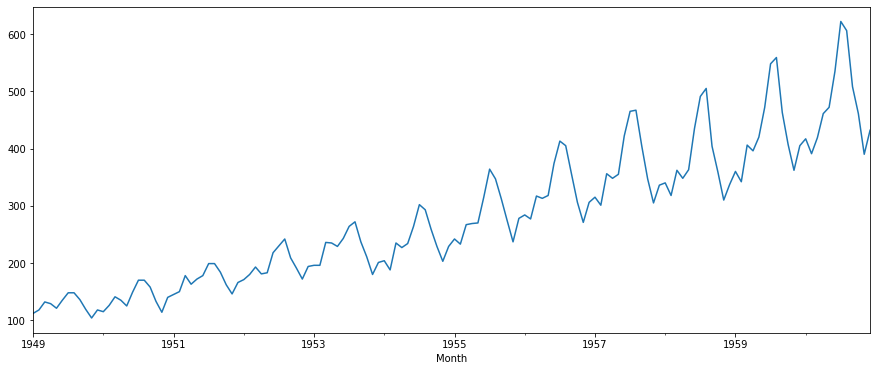

In [25]:
ts.plot()

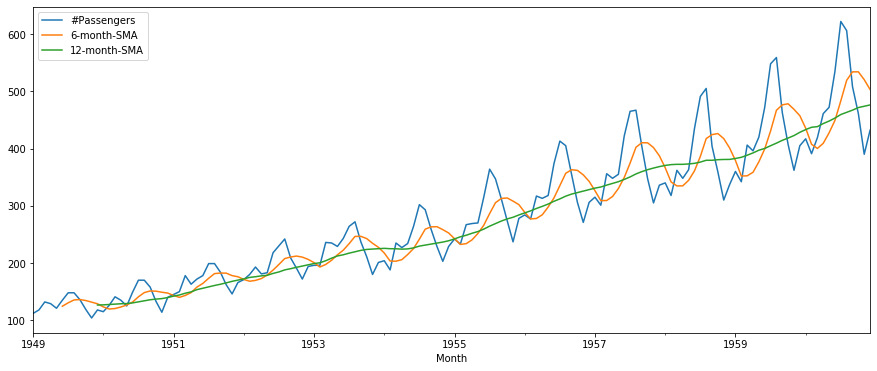

In [26]:
# Now plot the 6 & 12 month SMA with the original data
data.plot()

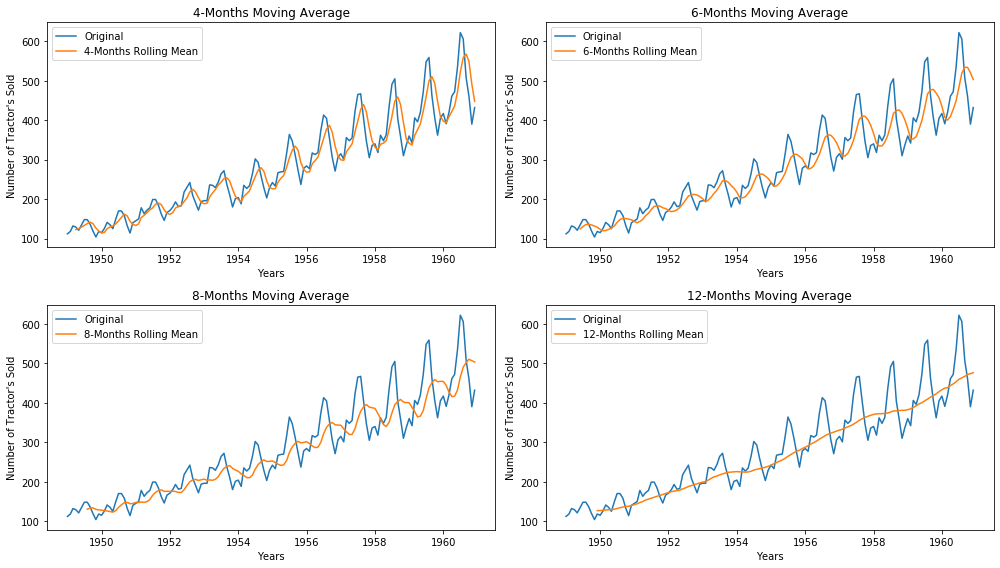

In [27]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(ts.index, ts, label='Original')
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(ts.index, ts, label='Original')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(ts.index, ts, label='Original')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

We can see that SMA has the following weaknesses:

* It will always lag by the size of the window.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Smaller windows will lead to more noise, rather than signal.

So, we use EWMA to fix some of these issues.

#### Exponential weighted moving average

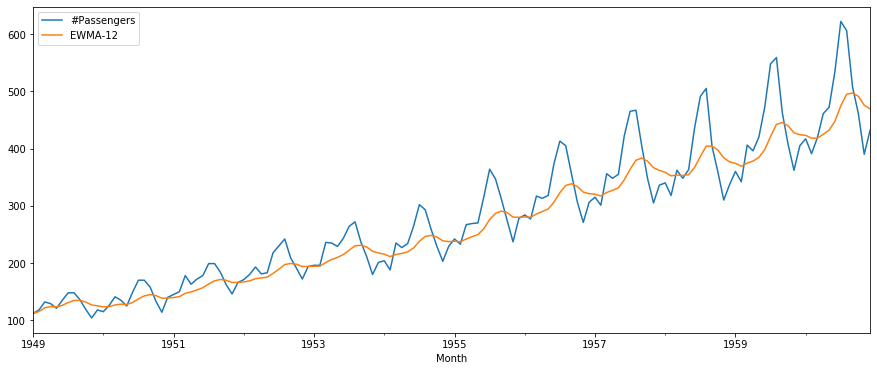

In [29]:
# Let's calculate EWMA with a span of 12 months and plot it with our series
data['EWMA-12'] = data['#Passengers'].ewm(span=12).mean()
data[['#Passengers', 'EWMA-12']].plot()

We can clearly see that our series doesn't lag anymore. More weight has been put on the recent observations and the weight is gradually decreasing on observations going back.

### Decomposition

In [0]:
# Let's try decomposing the series to see individual components of the series.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['#Passengers'], model = 'multiplicative')

In [31]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

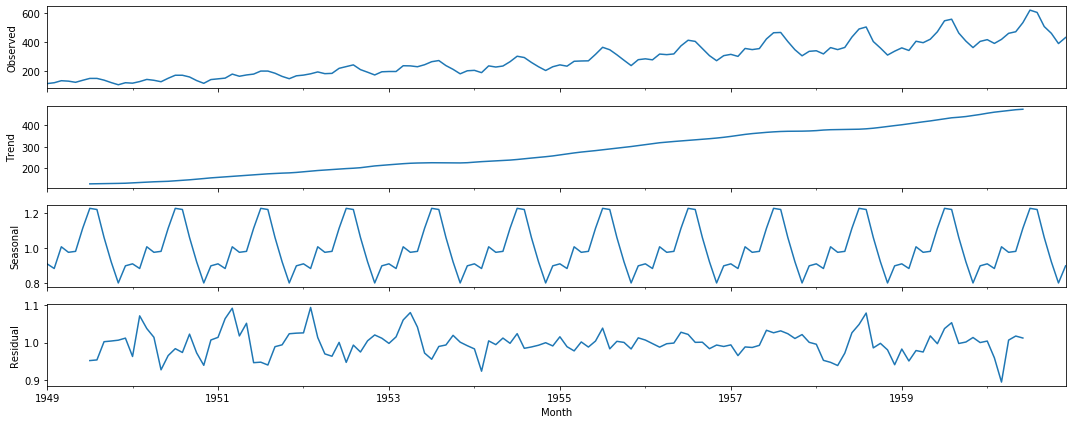

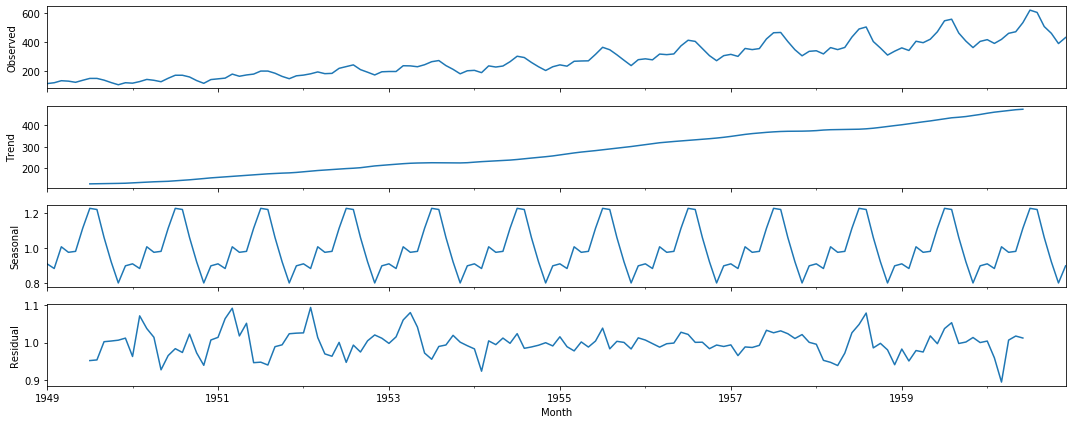

In [32]:
result.plot()

In [33]:
pd.DataFrame(result.trend)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


In [34]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: #Passengers, Length: 144, dtype: float64

In [36]:
decompose_output = pd.DataFrame(pd.concat([pd.DataFrame(result.observed),pd.DataFrame(result.trend), pd.DataFrame(result.seasonal), pd.DataFrame(result.resid)],axis=1))
decompose_output.columns = list(['Actual', 'Trend', 'Seasonal', 'Resid'])
decompose_output.head(10)

,Actual,Trend,Seasonal,Resid
Month,,,,
1949-01-01,112,NaN,0.910230,NaN
1949-02-01,118,NaN,0.883625,NaN
1949-03-01,132,NaN,1.007366,NaN
1949-04-01,129,NaN,0.975906,NaN
1949-05-01,121,NaN,0.981378,NaN
1949-06-01,135,NaN,1.112776,NaN
1949-07-01,148,126.791667,1.226556,0.951664
1949-08-01,148,127.250000,1.219911,0.953401
1949-09-01,136,127.958333,1.060492,1.002220


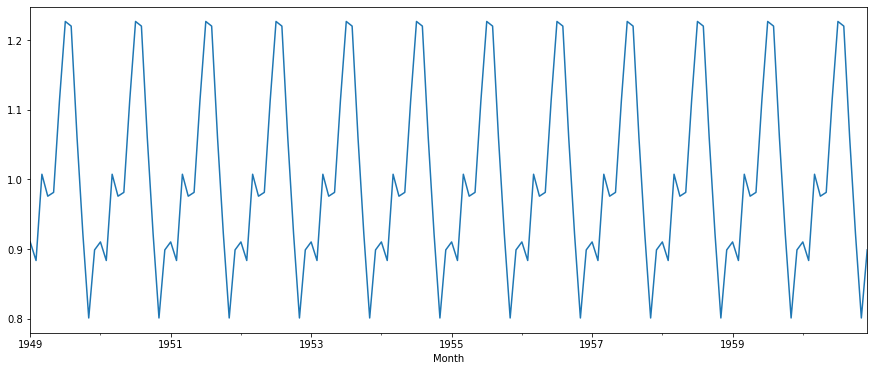

In [37]:
result.seasonal.plot()

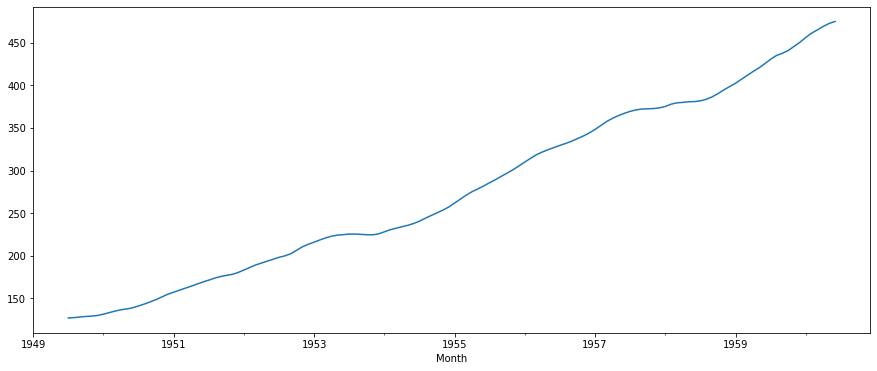

In [38]:
result.trend.plot()

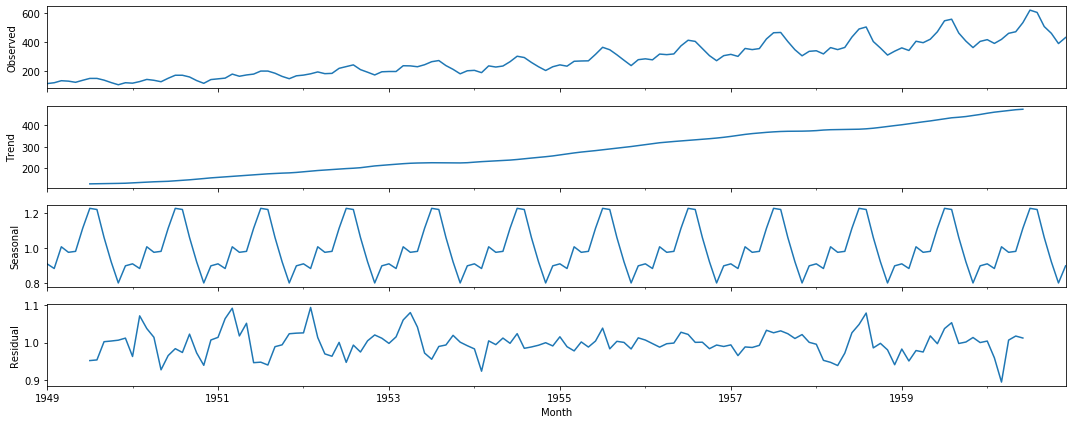

In [39]:
fig = result.plot() #if you just add.plot() to result it'll give dual plots

### Stationary Series

### How to Check Stationarity of a Time Series?

- A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

- Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

> constant mean <br>
> constant variance <br>
> an autocovariance that does not depend on time. <br>

- I’ll skip the details as it is very clearly defined in this article. Lets move onto the ways of testing stationarity. First and foremost is to simple plot the data and analyze visually. The data can be plotted using following command:


